# Morphological Transformations
* 이미지 segmentation → 단순화, 제거, 보정 → 형태 파악
### Dilation, Erosion → Opening, Clossing
### Structuring element

### Erosion : 이미지 X 커널 = 하나라도 작은 값이 있으면 제거...
### Dilation : 이미지 X 커널 = 하나라도 큰 값이 있으면 확장...
### Opening : Erosion → Dilation, 작은 이미지나 돌기 제거
### Closing : Dilation → Erosion, 전체적인 윤곽 파악에 적합

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
from io import BytesIO
import requests

In [5]:
### Structuring Element
kernel = np.ones((5, 5), np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [6]:
### cv2.getStructuringElement()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
### cv2.getStructuringElement()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [9]:
original = cv2.imread('original_j.jpg')
indot = cv2.imread('indot_j.jpg')
outdot = cv2.imread('outdot_j.jpg')

print(original.shape)
print(indot.shape)
print(outdot.shape)

(1438, 1080, 3)
(1211, 909, 3)
(1439, 1080, 3)


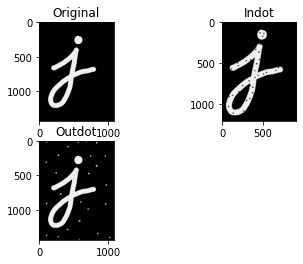

In [15]:
plt.subplot(221)
plt.title('Original')
plt.imshow(original)

plt.subplot(222)
plt.title('Indot')
plt.imshow(indot)

plt.subplot(223)
plt.title('Outdot')
plt.imshow(outdot)

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))

erosion = cv2.erode(outdot, kernel, iterations=1)
dilation = cv2.dilate(indot, kernel, iterations=1)
opening = cv2.morphologyEx(outdot, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(indot, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(original, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(original, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(original, cv2.MORPH_BLACKHAT, kernel)

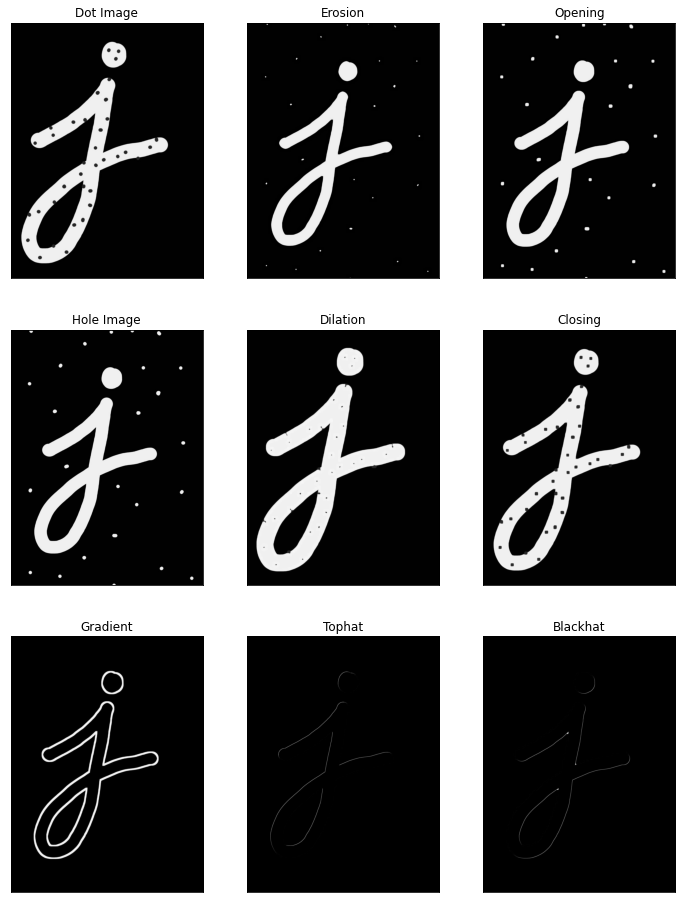

In [21]:
images = [indot, erosion, opening, outdot, dilation, closing, gradient, tophat, blackhat]
titles = ['Dot Image', 'Erosion', 'Opening', 'Hole Image', 'Dilation', 'Closing', 'Gradient', 'Tophat', 'Blackhat']

plt.figure(figsize=(12, 16))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()